# Quick Testing

## The bulk of this project's code converts, encodes, parses, and preprocesses data. At the end of those steps, the data is ready to be fed to a model. 

## To verify that all this code works as expected, we will quickly load the data as if we were about to start training. Instead however, we will plot the images and their annotations to make sure these are correct.

Files covered - 
(scripts.create_TFRecords.py, helper_functions.load_TFRecords.py, helper_functions.annotation_type_conversions.py, classes.LabelTensor.py, classes.ObjectAnnotations.py)

In [1]:
%cd C:\Users\Raivo Koot\Desktop\YOLOTensorflow

C:\Users\Raivo Koot\Desktop\YOLOTensorflow


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from YOLO.src.helper_functions.load_TFRecords import get_dataset
from YOLO.src.helper_functions.annotation_type_conversions import gridcell_boundingbox_toglobal
from YOLO.src.classes.ObjectAnnotations import YOLOObjectAnnotation
from YOLO.src.helper_functions.model_output_utils import extract_boxes, draw_boundingboxes_on_image
import cv2

In [3]:
filenames = ['train-000-of-010.tfrecord', 
             'train-001-of-010.tfrecord',
             'train-002-of-010.tfrecord',
             'train-003-of-010.tfrecord',
             'train-004-of-010.tfrecord',
             'train-005-of-010.tfrecord',
             'train-006-of-010.tfrecord',
             'train-007-of-010.tfrecord',
             'train-008-of-010.tfrecord',
             'train-009-of-010.tfrecord',]

train = get_dataset(filenames)

In [4]:
import YOLO.GlobalValues as GlobalValues
GlobalValues.initialize()

B = GlobalValues.B
C = GlobalValues.CLASSES
S = GlobalValues.S

# Plot 16 random images and draw their YOLO annotations on top

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


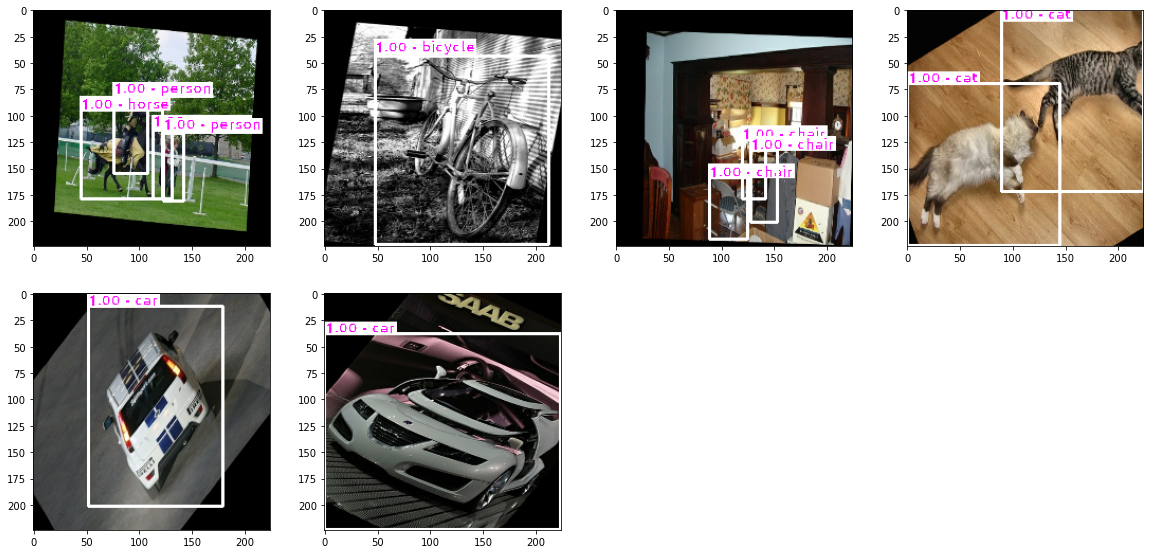

In [8]:
plt.figure(figsize=(20,20))

for x, y in train.take(1):
    # First 17 of Batch
    for i in range(1,7):
        image = x[i].numpy()
        image = (image + 1) / 2. # In its current format image is -1 to 1.
                                 # Here, we scale it back to 0-1 for matplotlib.
        label = y[i]
        annotations = extract_boxes(label, 1., B, C, S)

        draw_boundingboxes_on_image(image, annotations)
        
        plt.subplot(4,4,i)
        plt.imshow(image)
    